# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()

# Print the result
print("Number of mice:", num_mice)

Number of mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Print the duplicate mice
print("Duplicate mice:")
duplicate_mice

Duplicate mice:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice["Mouse ID"])]

# Print the data for the duplicate mouse IDs
duplicate_data

Data for the duplicate mouse IDs:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='first')
print("Clean DataFrame without duplicate mouse IDs:")
clean_data

Clean DataFrame without duplicate mouse IDs:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()

# Print the result
print("Number of mice in the clean DataFrame:", num_mice_clean)


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 
                              'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'}, inplace=True)

# Print the summary statistics DataFrame
print("Summary Statistics Table:")
summary_stats


Summary Statistics Table:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
).reset_index()

# Print the summary statistics DataFrame
print("Summary Statistics Table:")
summary_stats

Summary Statistics Table:


,Drug Regimen,Mean,Median,Variance,Standard_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

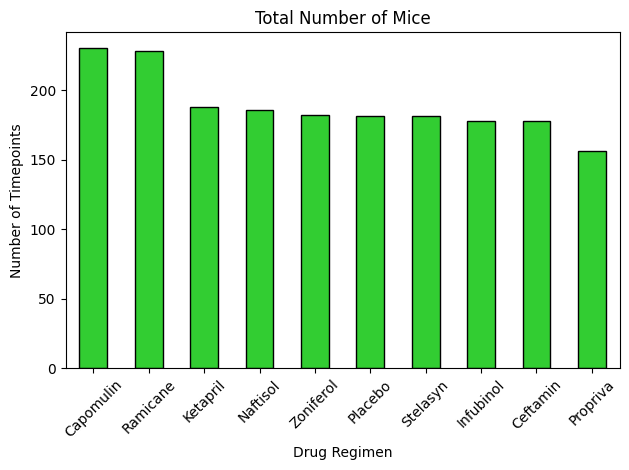

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_pandas = clean_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas
drug_regimen_pandas.plot(kind="bar", rot=45, color='limegreen', edgecolor='black')

#Set plot labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title('Total Number of Mice')

# Display the plot
plt.tight_layout()
plt.show()

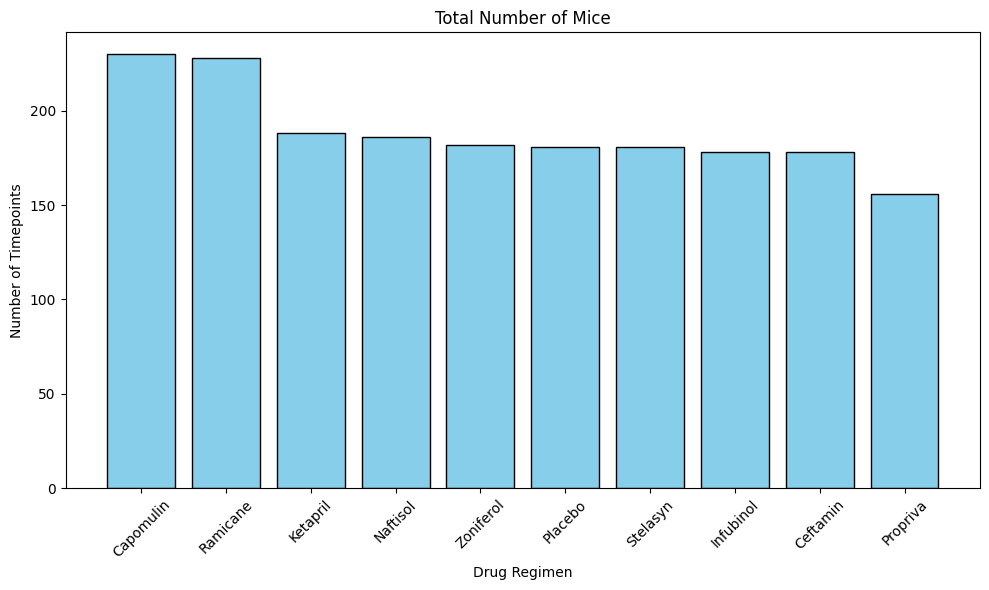

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_pandas = clean_data["Drug Regimen"].value_counts()

# Extract the drug regimens and their corresponding counts
drug_regimens = drug_regimen_pandas.index
counts = drug_regimen_pandas.values

# Create a bar plot using pyplot
plt.figure(figsize= (10, 6))  
plt.bar(drug_regimens, counts, color='skyblue', edgecolor='black')

# Set plot labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title('Total Number of Mice')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


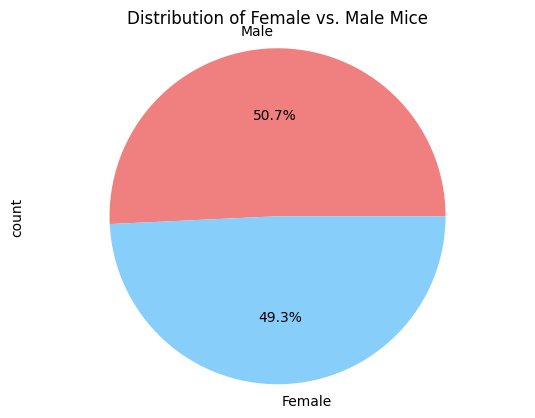

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Get the counts of female and male mice
gender_counts = clean_data["Sex"].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind="pie", autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Set plot title
plt.title("Distribution of Female vs. Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
#plt.tight_layout()
plt.show()

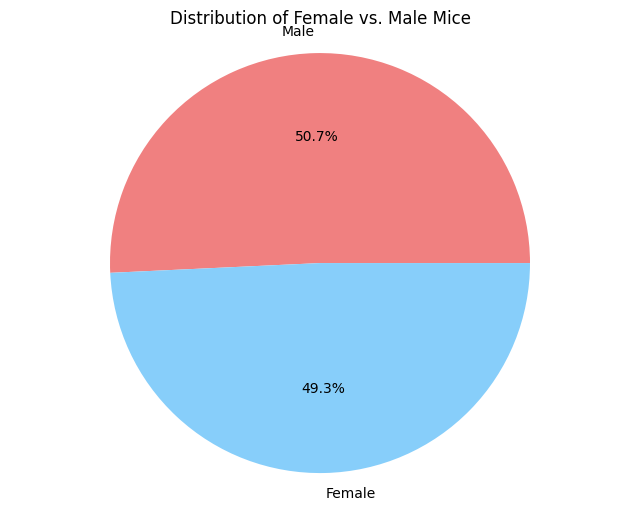

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a pie plot using pyplot
plt.figure(figsize=(8, 6))  
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Set plot title
plt.title("Distribution of Female vs. Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot

plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_per_treatment = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(tumor_vol_per_treatment)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_per_treatment.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = tumor_vol_per_treatment[(tumor_vol_per_treatment < lower_bound) | (tumor_vol_per_treatment > upper_bound)]
    
    print(f"-----------------------------------")
    print(f"{treatment} Treatment:")
    print(f"Lower Quartile: {lower_q}")
    print(f"Upper Quartile: {upper_q}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    if not outliers.empty:
        print(f"Potential Outliers: {outliers}")
    else:
        print("No potential outliers found.")
    print(f"-----------------------------------")

-----------------------------------
Capomulin Treatment:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
No potential outliers found.
-----------------------------------
-----------------------------------
Ramicane Treatment:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
No potential outliers found.
-----------------------------------
-----------------------------------
Infubinol Treatment:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------------
-----------------------------------
Ceftamin Treatment:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper B

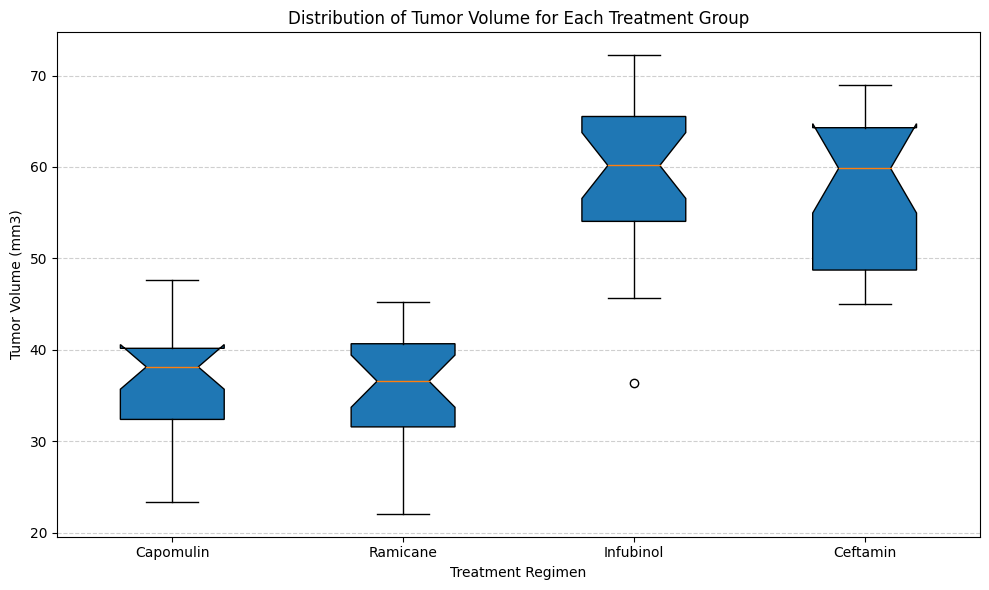

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a box plot
plt.figure(figsize=(10, 6))  
plt.boxplot(tumor_vol_data, labels=treatments, notch=True, patch_artist=True)

# Set plot labels and title
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Show the grid
plt.grid(axis='y', linestyle='dashed', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

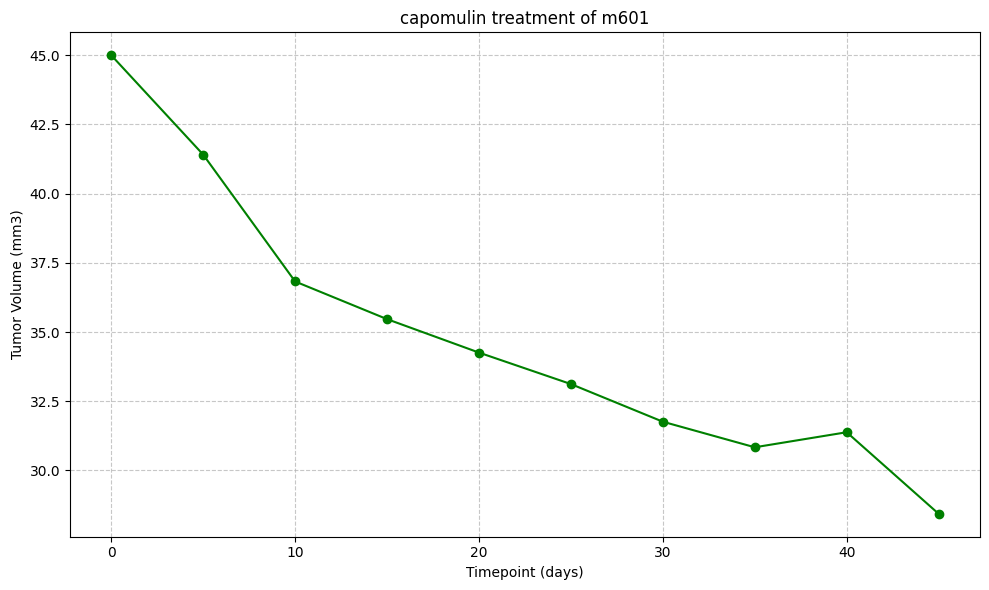

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a single mouse treated with Capomulin
mouse_id_capomulin = "m601"

# Filter the data to get the rows for the chosen mouse treated with Capomulin
single_mouse_data = clean_data.loc[(clean_data["Mouse ID"] == mouse_id_capomulin) & (clean_data["Drug Regimen"] == "Capomulin")]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6)) 
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o', color='g')

# Set plot labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"capomulin treatment of {mouse_id_capomulin}")

# Show the grid
plt.grid(linestyle='dashed', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

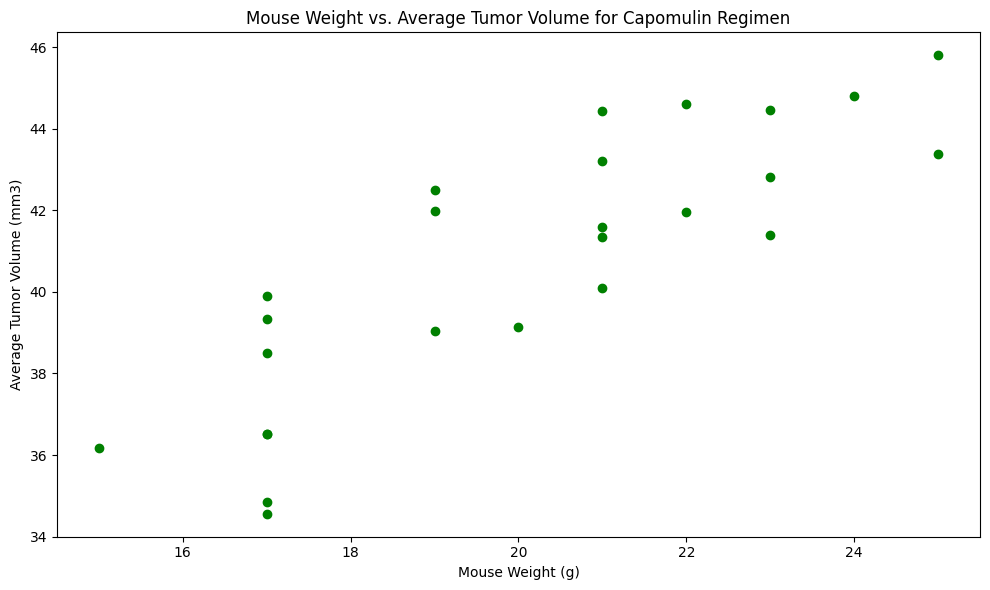

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data to get only the rows for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot for mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))  
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='g')

# Set plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Display the plot
plt.tight_layout()
plt.show()

## Correlation and Regression

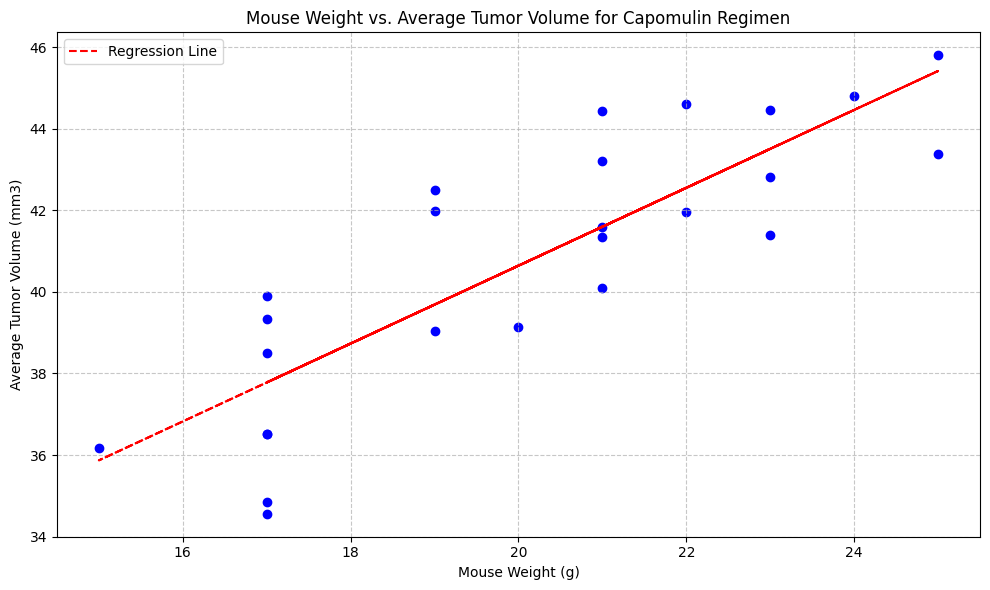

Correlation Coefficient: 0.841936342469472


In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Filter the data to get only the rows for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation_coefficient, _ = st.pearsonr(mouse_weight, avg_tumor_volume)

# Perform linear regression to get the slope and intercept of the line
slope, intercept, _, _, _ = st.linregress(mouse_weight, avg_tumor_volume)

# Create a scatter plot for mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))  
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='b')

# Plot the linear regression line
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='r', linestyle='dashed', label='Regression Line')

# Set plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Show the grid and legend
plt.grid(linestyle='dashed', alpha=0.7)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")